In [1]:
# General exploration of VOLCAT retrievals for Bezymianny eruption in October 2020.

In [2]:
%load_ext autoreload

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
from monetio.models import hysplit
from utilvolc import volcMER
from utilvolc import volcat

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [5]:
%autoreload
vidA = 'v300250'
d1 = datetime.datetime(2020,10,21,22)
d2 = datetime.datetime(2020,10,21,23)
tdir = '/pub/ECMWF/JPSS/VOLCAT/Bezymianny/Ash/pc_corrected_4/'
volcat.get_volcat_name_df(tdir,daterange=[d1,d2],vid=vidA,include_last=True)

,algorithm name,satellite platform,event scanning strategy,event date,event time,volcano id,description,WMO satellite id,image scanning strategy,image date,image time,feature id,idate,edate,filename
8,VOLCAT,HIMAWARI-8,FLDK,s2020295,220000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:00:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_220000_v300250...
9,VOLCAT,HIMAWARI-8,FLDK,s2020295,221000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:10:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_221000_v300250...
10,VOLCAT,HIMAWARI-8,FLDK,s2020295,222000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:20:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_222000_v300250...
11,VOLCAT,HIMAWARI-8,FLDK,s2020295,223000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:30:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_223000_v300250...
12,VOLCAT,HIMAWARI-8,FLDK,s2020295,224000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:40:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_224000_v300250...
13,VOLCAT,HIMAWARI-8,FLDK,s2020295,225000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 22:50:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_225000_v300250...
14,VOLCAT,HIMAWARI-8,FLDK,s2020295,230000,v300250,VCB,w167,FLDK,b2020295,204000,g001,2020-10-21 20:40:00,2020-10-21 23:00:00,VOLCAT_HIMAWARI-8_FLDK_s2020295_230000_v300250...


In [5]:
# Example of information in the VOLCAT filename.
%autoreload
tdir = '../data/volcat/'
vidA = 'v300250'
import glob
fnames = glob.glob(tdir +'VOLCAT*')
fnames
vn = volcat.VolcatName(fnames[0])
vn.vhash

{'algorithm name': '../data/volcat/VOLCAT',
 'satellite platform': 'HIMAWARI-8',
 'event scanning strategy': 'FLDK',
 'event date': 's2020295',
 'event time': '210000',
 'volcano id': 'v300250',
 'description': 'VCB',
 'WMO satellite id': 'w167',
 'image scanning strategy': 'FLDK',
 'image date': 'b2020295',
 'image time': '204000',
 'feature id': 'g001',
 'idate': datetime.datetime(2020, 10, 21, 20, 40),
 'edate': datetime.datetime(2020, 10, 21, 21, 0),
 'filename': '../data/volcat/VOLCAT_HIMAWARI-8_FLDK_s2020295_210000_v300250_VCB_w167_FLDK_b2020295_204000_g001_pc_rg.nc'}

In [14]:
#%autoreload
# CODE to write parallax corrected files.
#tdir = '../data/volcat/'
#vidA = 'v300250'
#d1 = datetime.datetime(2020,10,21,20,0)
#d2 = datetime.datetime(2020,10,22,20,0)
# this gets the original array.
#odas = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,correct_parallax=False,mask_and_scale=False)
#volcat.write_parallax_corrected_files(tdir,wdir,vid=vidA,verbose=True,daterange=[d1,d2])

In [6]:
%autoreload
# load volcat files. Parallax corrected but not regridded.
tdir = '../data/volcat_pc/'
bezyloc = [160.587,55.978]
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,20,0)
tlist = volcat.find_volcat(tdir,daterange=None,vid=vidA,return_val=1,verbose=True)
das = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA)

Not VOLCAT filename BezyVolcat_0p1.nc


In [7]:
das[10]

<xarray.Dataset>
Dimensions:                      (time: 1, x: 249, y: 230)
Coordinates:
  * time                         (time) datetime64[ns] 2020-10-21T22:20:00
    latitude                     (y, x) float32 ...
    longitude                    (y, x) float32 ...
Dimensions without coordinates: x, y
Data variables:
    ash_mass_loading             (time, y, x) float32 ...
    ash_cloud_height             (time, y, x) float32 ...
    effective_radius_of_ash      (time, y, x) float32 ...
    ash_mass_loading_total_mass  (time) float32 ...
    feature_area                 (time) float32 ...
    feature_age                  (time) timedelta64[ns] ...
    feature_id                   (time) int32 ...
Attributes: (12/34)
    naming_authority:                        gov.nesdis.noaa
    Conventions:                             CF-1.7
    Metadata_Conventions:                    Unidata Dataset Discovery v1.0
    standard_name_vocabulary:                CF Standard Name Table (v35, 20 ...
    institution:                             DOC/NOAA/NESDIS > U.S. Departmen...
    project:                                 VOLCAT
    ...                                      ...
    event_type:                              VCB
    volcano_name:                            Bezymianny
    event_observation_time:                  2020-10-21T22:20:17.0Z
    time_coverage_start_first_detection:     2020-10-21T20:40:00.0Z
    event_observation_time_first_detection:  2020-10-21T20:50:17.0Z
    parallax corrected coordinates:          True

In [8]:
vht  = volcat.get_height(das[iii],clip=True)

NameError: name 'iii' is not defined

In [ ]:
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude')

<xarray.DataArray 'ash_cloud_height' ()>
array(10.28999996)


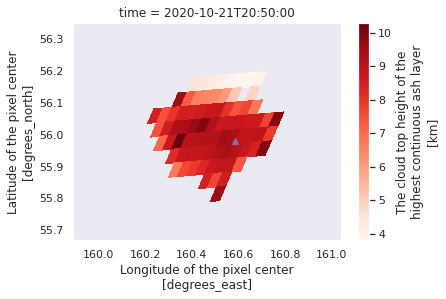

<xarray.DataArray 'ash_mass_loading' ()>
array(28.42551041)


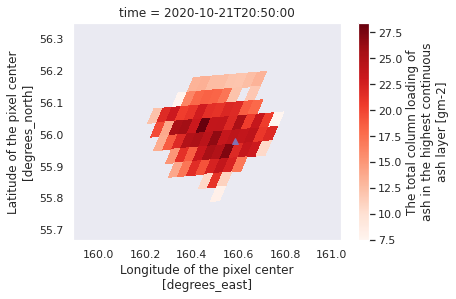

In [9]:
# plot ash mass loading and ash height.
iii=1  # index of time period to plot.
#----------------------------------------
vht  = volcat.get_height(das[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap="Reds")
plt.plot(bezyloc[0],bezyloc[1],'m^')
plt.savefig('bezy_volcat_2040_ht.png')
print(np.max(vht))
plt.show()
vht  = volcat.get_mass(das[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds',shading='nearest')
plt.plot(bezyloc[0],bezyloc[1],'m^')
plt.savefig('bezy_volcat_2040_ht.png')
print(np.max(vht))
plt.show()

#vht.isel(time=0).plot.pcolormesh()

HT 4 km : MER 2.25e+02 kg/s
HT 5 km : MER 3.18e+03 kg/s
HT 6 km : MER 1.58e+04 kg/s
HT 7 km : MER 5.02e+04 kg/s
HT 8 km : MER 1.24e+05 kg/s
HT 9 km : MER 2.59e+05 kg/s
HT 10 km : MER 4.85e+05 kg/s
HT 11 km : MER 8.37e+05 kg/s
HT 12 km : MER 1.36e+06 kg/s
HT 13 km : MER 2.09e+06 kg/s
HT 14 km : MER 3.09e+06 kg/s
HT 15 km : MER 4.41e+06 kg/s
HT 16 km : MER 6.13e+06 kg/s


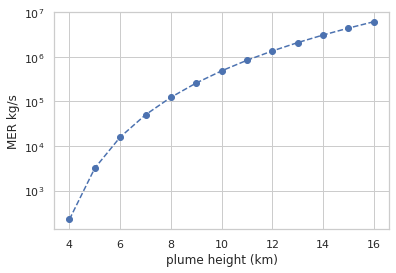

In [30]:
# how various plume heights correspond to MER according to Mastin equation.
sns.set()
sns.set_style('whitegrid')
vent = 2.88 #km  (9,455 ft)
htlist = [4,5,6,7,8,9,10,11,12,13,14,15,16]
merlist = []
for ht in htlist:
    ht2 = ht - vent
    MER = volcMER.mastinMER(ht2)
    print('HT {} km : MER {:0.2e} kg/s'.format(ht, MER))
    merlist.append(MER)
    
plt.plot(htlist, merlist, '--bo')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('plume height (km)')
ax.set_ylabel('MER kg/s')
plt.savefig('Mastin_mer_bezy.png')

In [31]:
%autoreload
from utilvolc import volcat_plots as vp
volcplot = vp.VolcatPlots(das)
volcplot.make_arrays()

here


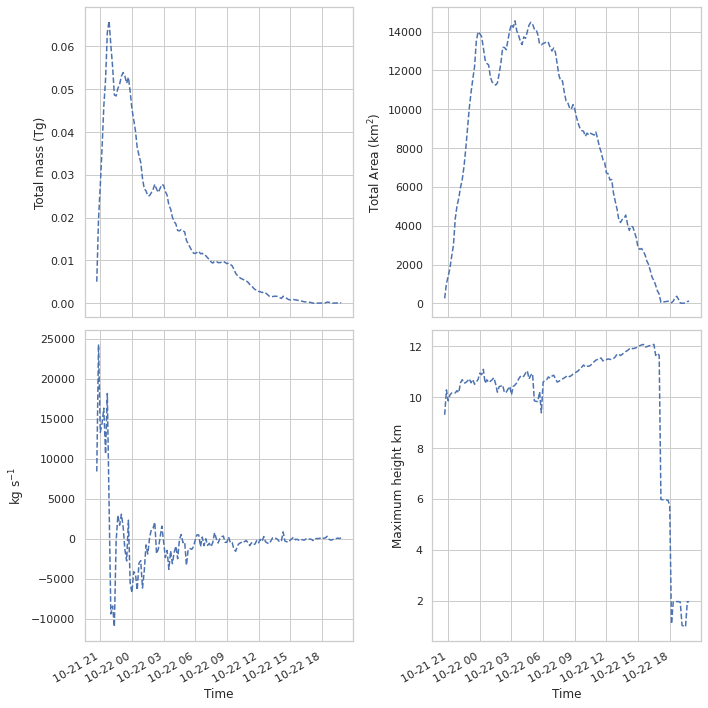

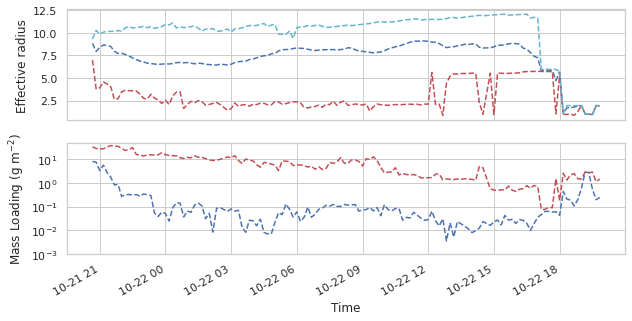

In [13]:
%autoreload
#volcplot.set_plot_settings()
fig1 = volcplot.plot_multiA(fignum=1)
fig2 = volcplot.plot_multiB(fignum=2)
fig1.savefig('Bezy_volcat_plotA.png')
fig2.savefig('Bezy_volcat_plotB.png')

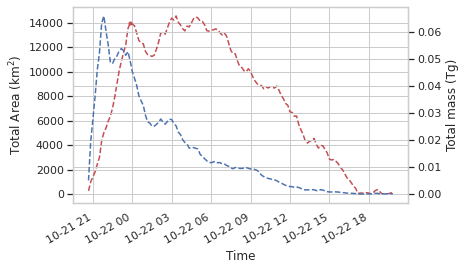

In [21]:
%autoreload
# Looking at Total Area and Total mass on same plot
fig = plt.figure(3)
d2 = datetime.datetime(2020,10,22,0,20)
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
volcplot.sub_plot_area(ax,clr=0)
volcplot.sub_plot_mass(ax2)
#ax.set_xlim(datetime.datetime(2020,10,21,20,30),d2)
ax.plot(datetime.datetime(2020,10,21,23,50),14000,'r.')
fig.autofmt_xdate()